In [ ]:
import seaborn as sea
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import string
from imblearn.under_sampling import RandomUnderSampler
from sklearn.utils import check_array
from sklearn.preprocessing import LabelEncoder
from scipy import sparse
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Used functions

In [ ]:
def plotFigureBoxPlot(columnName, title, dataframe):
    sea.boxplot(x=dataframe[columnName])
    plt.title(title)

In [ ]:
def numericAnalysis(columnName, dataframe):
    item = dataframe[columnName]

    print("Mean:\t", item.mean())
    print("Mode:\t", item.mode())
    print("Median:\t", item.median())
    print("Variance:\t", item.var())
    print("Std deviation:\t", item.std())
    print("Percentils (25, 50, 75):\t", item.quantile([0, 0.25, 0.5, 0.75, 1]));

In [ ]:
def plotBarChart(dataset, columnName):
    sea.set(style='whitegrid', palette="bright", font_scale=1.1, rc={"figure.figsize": [15, 10]})
    sea.histplot(x=columnName, data=dataset, bins=np.arange(0, 100, 5))
    plt.title(string.capwords(columnName) + " " + "distribution")

In [ ]:
def plotPieChart(data, labels, title, color=None):
    fig1, ax1 = plt.subplots()
    if (color == None):
        plt.style.use('seaborn-pastel')
    ax1.pie(data,
            labels=labels,
            autopct="%.1f%%",
            startangle=90,
            colors=color,
            pctdistance=0.85)

    fig = plt.gcf()
    ax1.axis('equal')
    plt.tight_layout()
    plt.title(title)

In [ ]:
def plotBarChartByAgeRange(dataset, columnName, label, title):
    ageRange = list(range(15, 95, 5))

    plt.figure(figsize=(18, 25))
    plt.subplot(3, 2, 1)
    dataset.groupby(pd.cut(dataset.age, ageRange))[columnName].mean().plot.bar()
    plt.ylabel(label)
    plt.title(title)


## Dataset reading

In [ ]:
fullDataset = pd.read_csv('bank-full.csv', sep=';')

In [ ]:
fullDataset.info()

In [ ]:
#check missing values
fullDataset.count()

In [ ]:
#check if there are null values
fullDataset.isnull().sum()

In [ ]:
#check if there are Nan values
fullDataset.isna().sum()

In [ ]:
#check if there are duplicated values
fullDataset.duplicated().sum()

In [ ]:
fullDataset.describe()

In [ ]:
fullDataset.y.value_counts()

### Resampling Imbalanced Dataset

In [ ]:
X = fullDataset.drop('y',axis=1)
Y = fullDataset['y']

rus = RandomUnderSampler(sampling_strategy='majority', random_state=1)
xData, yData = rus.fit_resample(X, Y)

yData = yData.reset_index()
yData.drop('index', axis=1, inplace=True)

dataset = pd.concat([xData, yData], axis=1)

In [ ]:
yData.y.value_counts()

In [ ]:
plt.figure(figsize = (12,10))
plt.subplot(2,2,1)
sea.countplot(data=fullDataset, x='y')
plt.title('Target Count')

plt.subplot(2,2,2)
labels = fullDataset['y'].value_counts(sort=True).index
sizes = fullDataset['y'].value_counts(sort=True)
plt.pie(sizes,labels=labels,autopct='%.2f')
plt.title('Target Yes and No')

plt.subplot(2,2,3)
sea.countplot(data=yData, x='y')
plt.title('Target Count')

plt.subplot(2,2,4)
labels = yData['y'].value_counts(sort=True).index
sizes = yData['y'].value_counts(sort=True)
plt.pie(sizes,labels=labels,autopct='%.2f')
plt.title('Target Yes and No')

## Features Analysis

### Find the numeric outliers so that we can drop them when we get there

In [ ]:

cols = ['age','balance','day','duration','campaign','pdays','previous']
colsY=cols
colsY += ['y']


#plt.figure(figsize=(15,18))
#for i,numericDataset in enumerate(colsY):
 #   print(i,numericDataset)
  #  plt.subplot(4,2,i+1)
   # sea.boxplot(x=numericDataset,data=dataset[cols])
    #plt.title("Boxplot of {}".format(numericDataset),size=20,color="red")
    #plt.xlabel("{}".format(numericDataset),size=15)
#plt.tight_layout()

### Age

In [ ]:
numericAnalysis("age", dataset)

In [ ]:
plotBarChart(dataset, "age")

In [ ]:
sea.boxplot(x=dataset["age"])
plt.title("Age quantiles")

### Job

In [ ]:
jobCounts = dataset["job"].value_counts()
jobCounts

In [ ]:
jobCountsPercentage = dataset["job"].value_counts(normalize=True) * 100
jobCountsPercentage

In [ ]:
plotBarChart(dataset, "job")

plotPieChart(jobCounts.tolist(), jobCounts.keys(), "job")

### Marital status

In [ ]:
maritalCounts = dataset["marital"].value_counts()
maritalCounts

In [ ]:
maritalCountsPercentage = dataset["marital"].value_counts(normalize=True) * 100
maritalCountsPercentage

In [ ]:
plotBarChart(dataset, "marital")

plotPieChart(maritalCounts.tolist(), maritalCounts.keys(), "marital")

### Education

In [ ]:
educationCounts = dataset["education"].value_counts()
educationCounts

In [ ]:
educationCountsPercentage = dataset["education"].value_counts(normalize=True) * 100
educationCountsPercentage

In [ ]:
plotBarChart(dataset, "education")

plotPieChart(educationCounts.tolist(), educationCounts.keys(), "education")

### Default

In [ ]:
defaultCounts = dataset["default"].value_counts()
defaultCounts

In [ ]:
defaultCountsPercentage = dataset["default"].value_counts(normalize=True) * 100
defaultCountsPercentage

In [ ]:
plotBarChart(dataset, "default")

plotPieChart(defaultCounts.tolist(), defaultCounts.keys(), "default")

### Housing

In [ ]:
defaultCounts = dataset["default"].value_counts()
defaultCounts

In [ ]:
defaultCountsPercentage = dataset["default"].value_counts(normalize=True) * 100
defaultCountsPercentage

In [ ]:
plotBarChart(dataset, "default")

plotPieChart(defaultCounts.tolist(), defaultCounts.keys(), "default")

### Loan

In [ ]:
loanCounts = dataset["loan"].value_counts()
loanCounts

In [ ]:
loanCountsPercentage = dataset["loan"].value_counts(normalize=True) * 100
loanCountsPercentage

In [ ]:
plotBarChart(dataset, "loan")

plotPieChart(loanCounts.tolist(), loanCounts.keys(), "loan")

### Contact

In [ ]:
contactCounts = dataset["contact"].value_counts()
contactCounts

In [ ]:
contactCountsPercentage = dataset["contact"].value_counts(normalize=True) * 100
contactCountsPercentage

In [ ]:
plotBarChart(dataset, "contact")

plotPieChart(contactCounts.tolist(), contactCounts.keys(), "contact")

### Month

In [ ]:
monthCounts = dataset["month"].value_counts()
monthCounts

In [ ]:
monthCountsPercentage = dataset["month"].value_counts(normalize=True) * 100
monthCountsPercentage

In [ ]:
plotBarChart(dataset, "month")

plotPieChart(monthCounts.tolist(), monthCounts.keys(), "month")

### Day of week

In [ ]:
dayOfWeekCounts = dataset["day"].value_counts()
dayOfWeekCounts

In [ ]:
dayOfWeekCountsPercentage = dataset["day"].value_counts(normalize=True) * 100
dayOfWeekCountsPercentage

In [ ]:
plotBarChart(dataset, "day")

plotPieChart(dayOfWeekCounts.tolist(), dayOfWeekCounts.keys(), "day")

### Last contact duration

In [ ]:
numericAnalysis("duration", dataset)

In [ ]:
durationCounts = dataset["duration"].value_counts()
durationCounts

In [ ]:
durationCountsPercentage = dataset["duration"].value_counts(normalize=True) * 100
durationCountsPercentage

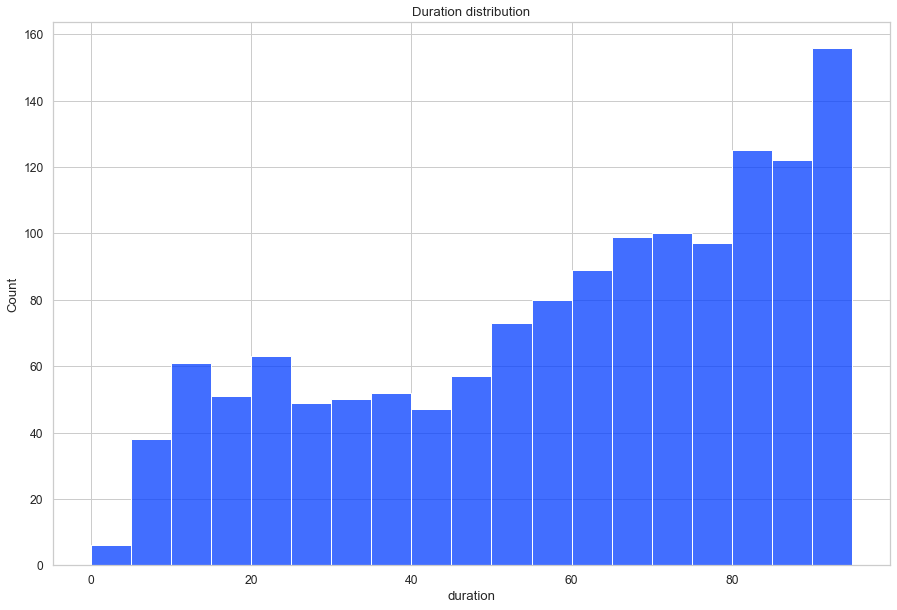

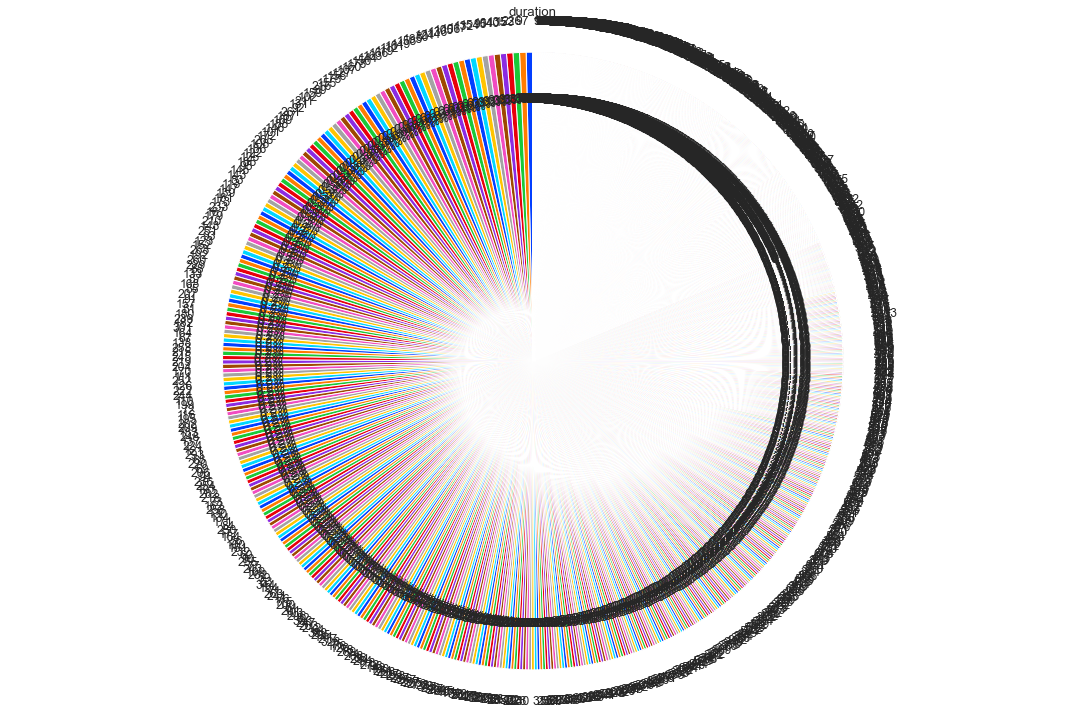

In [197]:
plotBarChart(dataset, "duration")

plotPieChart(durationCounts.tolist(), durationCounts.keys(), "duration")

##### Outlier

In [198]:
#Remove data where duration is bigger than 2500
dataset.drop(dataset[dataset['duration']>2500].index,inplace=True,axis=0)


### Campaign

In [199]:
numericAnalysis("campaign", dataset)

Mean:	 2.497018457169901
Mode:	 0    1
Name: campaign, dtype: int64
Median:	 2.0
Variance:	 6.846190465864992
Std deviation:	 2.6165225903601503
Percentils (25, 50, 75):	 0.00     1.0
0.25     1.0
0.50     2.0
0.75     3.0
1.00    43.0
Name: campaign, dtype: float64


In [200]:
maritalCounts = dataset["campaign"].value_counts()
maritalCounts

1     4532
2     2811
3     1296
4      773
5      349
6      271
7      139
8       99
9       54
10      46
11      35
12      26
13      24
17      16
14      14
16      13
15      11
18       8
19       8
21       6
20       6
29       5
23       4
22       4
30       2
37       2
26       2
28       2
24       2
43       1
31       1
27       1
25       1
32       1
Name: campaign, dtype: int64

In [201]:
maritalCountsPercentage = dataset["campaign"].value_counts(normalize=True) * 100
maritalCountsPercentage

1     42.896356
2     26.606720
3     12.266919
4      7.316611
5      3.303360
6      2.565073
7      1.315665
8      0.937056
9      0.511122
10     0.435400
11     0.331283
12     0.246096
13     0.227165
17     0.151443
14     0.132513
16     0.123048
15     0.104117
18     0.075722
19     0.075722
21     0.056791
20     0.056791
29     0.047326
23     0.037861
22     0.037861
30     0.018930
37     0.018930
26     0.018930
28     0.018930
24     0.018930
43     0.009465
31     0.009465
27     0.009465
25     0.009465
32     0.009465
Name: campaign, dtype: float64

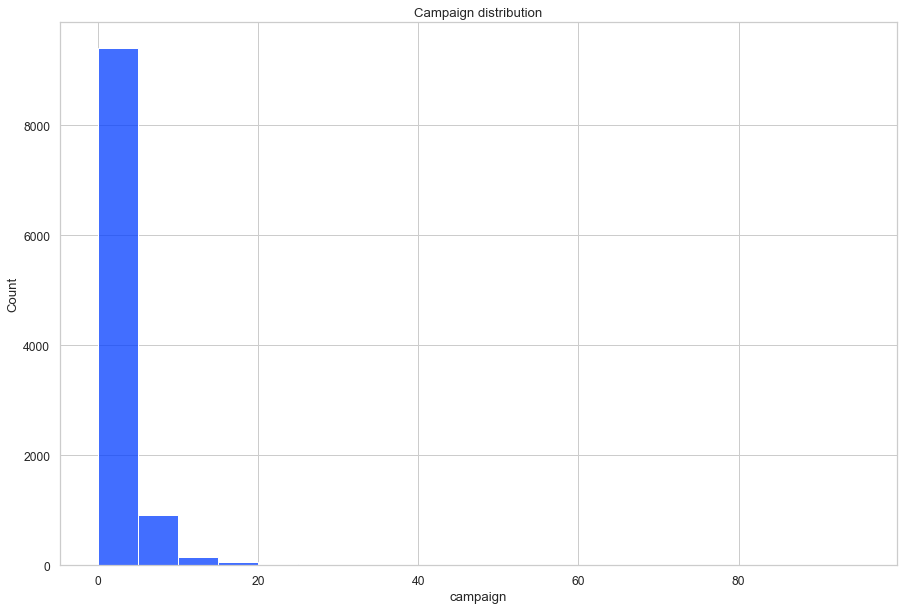

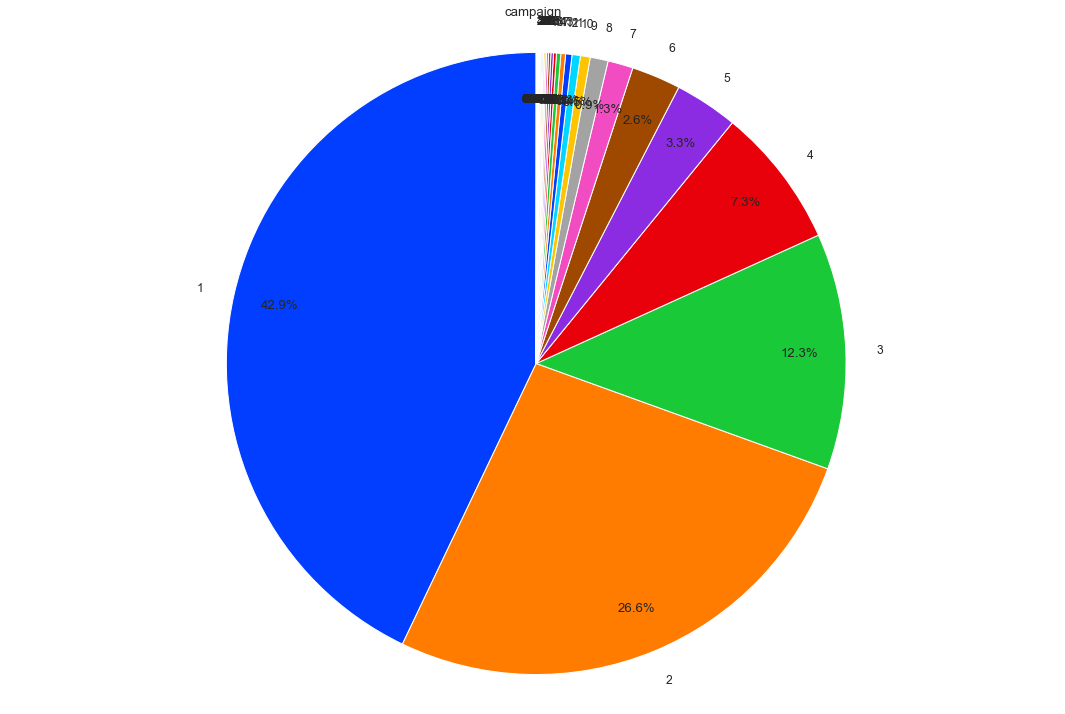

In [202]:
plotBarChart(dataset, "campaign")

plotPieChart(maritalCounts.tolist(), maritalCounts.keys(), "campaign")

###### Outlier

In [203]:
#Remove data where campaign is bigger than 40
dataset.drop(dataset[dataset['campaign']>40].index,axis=0,inplace=True)

### Pdays

In [204]:
numericAnalysis("pdays", dataset)

Mean:	 51.662722453616055
Mode:	 0   -1
Name: pdays, dtype: int64
Median:	 -1.0
Variance:	 11784.7525589422
Std deviation:	 108.55760018967902
Percentils (25, 50, 75):	 0.00     -1.00
0.25     -1.00
0.50     -1.00
0.75     42.25
1.00    854.00
Name: pdays, dtype: float64


In [205]:
maritalCounts = dataset["pdays"].value_counts()
maritalCounts

-1      7858
 92       98
 182      89
 91       81
 181      80
        ... 
 578       1
 520       1
 17        1
 515       1
 33        1
Name: pdays, Length: 468, dtype: int64

In [206]:
maritalCountsPercentage = dataset["pdays"].value_counts(normalize=True) * 100
maritalCountsPercentage

-1      74.384703
 92      0.927679
 182     0.842484
 91      0.766755
 181     0.757289
          ...    
 578     0.009466
 520     0.009466
 17      0.009466
 515     0.009466
 33      0.009466
Name: pdays, Length: 468, dtype: float64

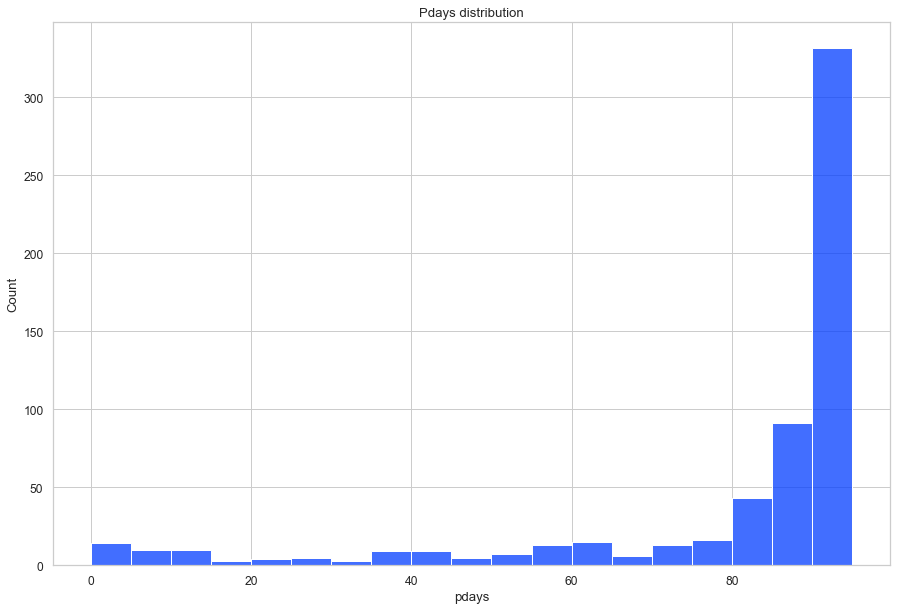

In [ ]:
plotBarChart(dataset, "pdays")

plotPieChart(maritalCounts.tolist(), maritalCounts.keys(), "pdays")

In [ ]:
#Remove all pdays data
dataset.drop("pdays",inplace=True,axis=1)

### Previous

In [ ]:
numericAnalysis("previous", dataset)

In [ ]:
previousCounts = dataset["previous"].value_counts()
previousCounts

In [ ]:
previousCountsPercentage = dataset["previous"].value_counts(normalize=True) * 100
previousCountsPercentage

In [ ]:
plotBarChart(dataset, "previous")

plotPieChart(previousCounts.tolist(), previousCounts.keys(), "previous")

In [ ]:
#Remove all data where previous is bigger than 30
dataset.drop(dataset[dataset['previous']>30].index,axis=0,inplace=True)

### PoutCome

In [ ]:
poutcomeCounts = dataset["poutcome"].value_counts()
poutcomeCounts

In [ ]:
poutcomeCountsPercentage = dataset["poutcome"].value_counts(normalize=True) * 100
poutcomeCountsPercentage

In [ ]:
plotBarChart(dataset, "poutcome")

plotPieChart(poutcomeCounts.tolist(), poutcomeCounts.keys(), "poutcome")

### Y - has the client subscribed a term deposit

In [ ]:
yCounts = dataset["y"].value_counts()
yCounts

In [ ]:
yCountsPercentage = dataset["y"].value_counts(normalize=True) * 100
yCountsPercentage

In [ ]:
plotBarChart(dataset, "y")

plotPieChart(yCounts.tolist(), yCounts.keys(), "y")

## Numeric features analysis

In [ ]:
plt.figure(figsize=(10,10))

for i, col in enumerate(dataset.select_dtypes(include=['int64']).columns):
    ax = plt.subplot(3,3, i+1)
    sea.histplot(x = dataset[col], ax=ax, kde = True)

plt.suptitle('Distributions of quantitative variables')
plt.tight_layout()

## Categoric features analisys in relation to target

In [ ]:
#divide data
datasetTemp = dataset.copy()
datasetCat = datasetTemp.select_dtypes(include='object').columns.drop(["y", "job"])

In [ ]:
plt.figure(figsize=(13, 15))

for i, data in enumerate(datasetCat):
    plt.subplot(4, 2, i + 1)
    sea.countplot(x=data, hue='y', data=dataset, edgecolor="black")
    plt.title("Countplot of {}  by deposit".format(data))
plt.tight_layout()
plt.show()

plt.figure(figsize=[14, 5])
sea.countplot(x='job', hue='y', edgecolor="black", data=dataset)
plt.title("Countplot of job by deposit")
plt.show()

## Features distribution by age range

In [ ]:
plotBarChartByAgeRange(dataset, "duration", 'Average call duration','Distribution of average call duration by age group')

In [ ]:
plotBarChartByAgeRange(dataset, "balance",'Average Annual Balance in euros','Average distribution of the annual balance in euros by age group')

In [ ]:
plotBarChartByAgeRange(dataset, "day",'Last contact day of the month','Distribution of last day of contact of the month by age group')

In [ ]:
plotBarChartByAgeRange(dataset, "campaign",'Number of contacts made during this campaign for a customer','Distribution of number of contacts made during this campaign to a customer by age group')

In [ ]:
plotBarChartByAgeRange(dataset, "previous",'Average number of contacts before this campaign for a customer','Distribution of the average number of contacts before this campaign for a customer')

## Scatter plots for only numeric data in relation to target

In [ ]:
cols = ['age','balance','day','duration','campaign','previous']
colsY=cols
colsY += ['y']
datasetNum = dataset[colsY]

plt.figure(figsize=(15,18))
for i, datasetN in enumerate(cols):
    print(i,datasetN)
    plt.subplot(4,2,i+1)
    sea.scatterplot(x=datasetN, y='y', data=datasetNum, color='yellow')
    plt.title("scatterplot of {} by target(depositos)".format(datasetN), size=20, color="white")
    plt.xlabel("{}".format(datasetN),size=15)
    plt.ylabel("Target(depositos)",size=15)
plt.tight_layout()

## Correlation Matrix

In [ ]:
dataset.corr()
plt.subplots(figsize=(18, 13))
hmap = sea.heatmap(data=dataset.corr(), annot=True, linewidths=0.5)
plt.title("Correlation Matrix", fontsize=15)
plt.tight_layout()

## [Extra] - Comparing data

### Education with marital status and balance

In [ ]:
education = dataset.groupby(['marital','education'], as_index=False)['balance'].agg({np.median,np.mean})
education = round(education,2)

ax = education.unstack(level=0).plot(kind='bar', subplots=True, rot=45, figsize=(20,8), layout=(1,6))
plt.tight_layout()

## Stratified sampling


In [ ]:
dataset['housing'].value_counts()/len(dataset)
dataset['loan'].value_counts()/len(dataset)
dataset['default'].value_counts()/len(dataset)

# Divide dataset between features e target
datasetTarget = dataset['y']
dataset = dataset.drop('y',axis=1)

# Test and train must have similar loans value

dataset['binary'] = dataset['loan'].astype(str) + dataset['default'].astype(str)

x_train_set, x_test_set , y_train, y_test  = train_test_split(dataset,datasetTarget,test_size=0.2, random_state=0, stratify=dataset[['binary']])

# Remove binary column because it was only an aux for the split
x_train_set = x_train_set.drop("binary",axis=1)
x_test_set = x_test_set.drop("binary",axis=1)

x_train_set['default'].value_counts()/len(x_train_set)
x_train_set['loan'].value_counts()/len(x_train_set)

x_test_set['default'].value_counts()/len(x_test_set)
x_test_set['loan'].value_counts()/len(x_test_set)

## Enconding categorical data

##### Binary Encoding for data that is 0 or 1
##### Ordinal Encoding for ordinal data that can be enumerated
##### OneHot Encoding for categorical data
##### Dummy Encoding for categorical data but n-1 when creating new features

In [ ]:
class CategoricalEncoder(BaseEstimator, TransformerMixin):
    """Encode categorical features as a numeric array.
    The input to this transformer should be a matrix of integers or strings,
    denoting the values taken on by categorical (discrete) features.
    The features can be encoded using a one-hot aka one-of-K scheme
    (``encoding='onehot'``, the default) or converted to ordinal integers
    (``encoding='ordinal'``).
    This encoding is needed for feeding categorical data to many scikit-learn
    estimators, notably linear models and SVMs with the standard kernels.
    Read more in the :ref:`User Guide `.
    Parameters
    ----------
    encoding : str, 'onehot', 'onehot-dense' or 'ordinal'
        The type of encoding to use (default is 'onehot'):
        - 'onehot': encode the features using a one-hot aka one-of-K scheme
          (or also called 'dummy' encoding). This creates a binary column for
          each category and returns a sparse matrix.
        - 'onehot-dense': the same as 'onehot' but returns a dense array
          instead of a sparse matrix.
        - 'ordinal': encode the features as ordinal integers. This results in
          a single column of integers (0 to n_categories - 1) per feature.
    categories : 'auto' or a list of lists/arrays of values.
        Categories (unique values) per feature:
        - 'auto' : Determine categories automatically from the training data.
        - list : ``categories[i]`` holds the categories expected in the ith
          column. The passed categories are sorted before encoding the data
          (used categories can be found in the ``categories_`` attribute).
    dtype : number type, default np.float64
        Desired dtype of output.
    handle_unknown : 'error' (default) or 'ignore'
        Whether to raise an error or ignore if a unknown categorical feature is
        present during transform (default is to raise). When this is parameter
        is set to 'ignore' and an unknown category is encountered during
        transform, the resulting one-hot encoded columns for this feature
        will be all zeros.
        Ignoring unknown categories is not supported for
        ``encoding='ordinal'``.
    Attributes
    ----------
    categories_ : list of arrays
        The categories of each feature determined during fitting. When
        categories were specified manually, this holds the sorted categories
        (in order corresponding with output of `transform`).
    Examples
    --------
    Given a dataset with three features and two samples, we let the encoder
    find the maximum value per feature and transform the data to a binary
    one-hot encoding.
    >>> from sklearn.preprocessing import LabelEncoder
    >>> enc = CategoricalEncoder(handle_unknown='ignore')
    >>> enc.fit([[0, 0, 3], [1, 1, 0], [0, 2, 1], [1, 0, 2]])
    ... # doctest: +ELLIPSIS
    CategoricalEncoder(categories='auto', dtype=<... 'numpy.float64'>,
              encoding='onehot', handle_unknown='ignore')
    >>> enc.transform([[0, 1, 1], [1, 0, 4]]).toarray()
    array([[ 1.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.],
           [ 0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.]])
    See also
    --------
    sklearn.preprocessing.OneHotEncoder : performs a one-hot encoding of
      integer ordinal features. The ``OneHotEncoder assumes`` that input
      features take on values in the range ``[0, max(feature)]`` instead of
      using the unique values.
    sklearn.feature_extraction.DictVectorizer : performs a one-hot encoding of
      dictionary items (also handles string-valued features).
    sklearn.feature_extraction.FeatureHasher : performs an approximate one-hot
      encoding of dictionary items or strings.
    """

    def __init__(self, encoding='onehot', categories='auto', dtype=np.float64,
                 handle_unknown='error'):
        self.encoding = encoding
        self.categories = categories
        self.dtype = dtype
        self.handle_unknown = handle_unknown

    def fit(self, X, y=None):
        """Fit the CategoricalEncoder to X.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_feature]
            The data to determine the categories of each feature.
        Returns
        -------
        self
        """

        if self.encoding not in ['onehot', 'onehot-dense', 'ordinal']:
            template = ("encoding should be either 'onehot', 'onehot-dense' "
                        "or 'ordinal', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.handle_unknown not in ['error', 'ignore']:
            template = ("handle_unknown should be either 'error' or "
                        "'ignore', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.encoding == 'ordinal' and self.handle_unknown == 'ignore':
            raise ValueError("handle_unknown='ignore' is not supported for"
                             " encoding='ordinal'")

        X = check_array(X, dtype=np.object, accept_sparse='csc', copy=True)
        n_samples, n_features = X.shape

        self._label_encoders_ = [LabelEncoder() for _ in range(n_features)]

        for i in range(n_features):
            le = self._label_encoders_[i]
            Xi = X[:, i]
            if self.categories == 'auto':
                le.fit(Xi)
            else:
                valid_mask = np.in1d(Xi, self.categories[i])
                if not np.all(valid_mask):
                    if self.handle_unknown == 'error':
                        diff = np.unique(Xi[~valid_mask])
                        msg = ("Found unknown categories {0} in column {1}"
                               " during fit".format(diff, i))
                        raise ValueError(msg)
                le.classes_ = np.array(np.sort(self.categories[i]))

        self.categories_ = [le.classes_ for le in self._label_encoders_]

        return self

    def transform(self, X):
        """Transform X using one-hot encoding.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_features]
            The data to encode.
        Returns
        -------
        X_out : sparse matrix or a 2-d array
            Transformed input.
        """
        X = check_array(X, accept_sparse='csc', dtype=np.object, copy=True)
        n_samples, n_features = X.shape
        X_int = np.zeros_like(X, dtype=np.int)
        X_mask = np.ones_like(X, dtype=np.bool)

        for i in range(n_features):
            valid_mask = np.in1d(X[:, i], self.categories_[i])

            if not np.all(valid_mask):
                if self.handle_unknown == 'error':
                    diff = np.unique(X[~valid_mask, i])
                    msg = ("Found unknown categories {0} in column {1}"
                           " during transform".format(diff, i))
                    raise ValueError(msg)
                else:
                    # Set the problematic rows to an acceptable value and
                    # continue `The rows are marked `X_mask` and will be
                    # removed later.
                    X_mask[:, i] = valid_mask
                    X[:, i][~valid_mask] = self.categories_[i][0]
            X_int[:, i] = self._label_encoders_[i].transform(X[:, i])

        if self.encoding == 'ordinal':
            return X_int.astype(self.dtype, copy=False)

        mask = X_mask.ravel()
        n_values = [cats.shape[0] for cats in self.categories_]
        n_values = np.array([0] + n_values)
        indices = np.cumsum(n_values)

        column_indices = (X_int + indices[:-1]).ravel()[mask]
        row_indices = np.repeat(np.arange(n_samples, dtype=np.int32),
                                n_features)[mask]
        data = np.ones(n_samples * n_features)[mask]

        out = sparse.csc_matrix((data, (row_indices, column_indices)),
                                shape=(n_samples, indices[-1]),
                                dtype=self.dtype).tocsr()
        if self.encoding == 'onehot-dense':
            return out.toarray()
        else:
            return out

In [ ]:

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names]

### Pipeline

In [ ]:
numerical_pipeline = Pipeline([('select_nume', DataFrameSelector(['age','balance','day','campaign','previous','duration'])),('std_scaler', StandardScaler())])

binary_encoding = Pipeline([('binary_cat_select',DataFrameSelector(['default','housing','loan'])),('binary_enc',CategoricalEncoder(encoding='onehot-dense'))])

ordinal_encoding = Pipeline([('ordinal_cat_select', DataFrameSelector(['month','contact','poutcome'])),('ordianl_enc',CategoricalEncoder(encoding='ordinal'))])

dummy_encoding = Pipeline([('dummy_cat_select',DataFrameSelector(['job','marital','education'])),('dummy_enc',CategoricalEncoder(encoding='onehot-dense'))])

preprocess_pipeline = FeatureUnion(transformer_list=[('numerical_pipeline',numerical_pipeline),('binary_enc',binary_encoding),('ordinal_encoding',ordinal_encoding),('dummy_encoding',dummy_encoding)])

x_train_set = preprocess_pipeline.fit_transform(x_train_set)
x_test_set = preprocess_pipeline.fit_transform(x_test_set)

### Without pipeline

In [ ]:
#Binary Encoding

list_bin = ['default','housing','loan']
for i in list_bin:
    dataset[i] = LabelBinarizer().fit_transform(dataset[i].values)

#Ordinal Encoding

list_ordinal=['month','contact','poutcome']
for i in list_ordinal:
    dataset[i]=LabelEncoder().fit_transform(dataset[i].values)

# Dummy Encoding

dataset = pd.get_dummies(dataset, columns= ['job','marital','education'])

# Reset Index and check dataset again

dataset = dataset.reset_index()
dataset.drop('index', axis=1, inplace=True)

dataset['binary'] = dataset['loan'].astype(str) + dataset['default'].astype(str)

x_train_set_np, x_test_set_np , y_train_set_np, y_test_set_np = train_test_split(dataset,datasetTarget,test_size=0.2, random_state=0, stratify=dataset[['binary']])

# Binary columns no longer needed
x_train_set_np = x_train_set_np.drop("binary",axis=1)
x_test_set_np = x_test_set_np.drop("binary",axis=1)


#Scaling

ss= StandardScaler()

x_train_set_np_org = ss.fit_transform(x_train_set_np)

x_test_set_np_org = ss.fit_transform(x_test_set_np)
x_train_set_np_sc = ss.fit_transform(x_train_set_np[['age','balance','day','duration','campaign','previous']])
x_test_set_np_sc = ss.transform(x_test_set_np[['age','balance','day','duration','campaign','previous']])